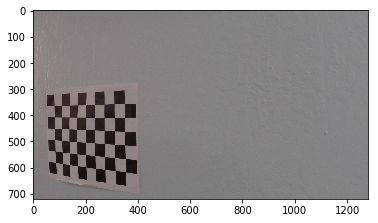

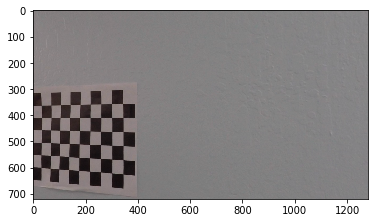

In [6]:
# In this cell we perform one time task of Caliberation: mtx, dist
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DISPLAY = True

nx = 9
ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob( './camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, 
                                                       (img.shape[1], img.shape[0]), None,None)
if DISPLAY:
    img = cv2.imread('./camera_cal/calibration20.jpg')
    plt.imshow(img)
    plt.show()
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(undist)
    plt.show()

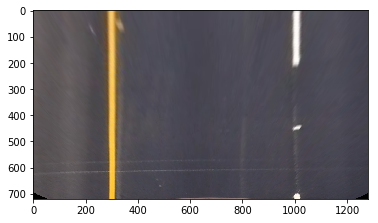

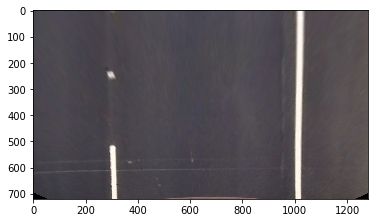

(720, 1280, 3)


In [28]:
# In this cell we perform one time task of getting perspective transform matrix: M
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


'''
not so good
pt1 = [603, 446]
pt2 = [676, 446]
pt3 = [1042, 678]
pt4 = [265, 678]
'''

'''
better than before this
pt1 = [575, 465]
pt2 = [708, 465]
pt3 = [1040, 678]
pt4 = [265, 678]

'''

pt1 = [540, 490]
pt2 = [748, 490]
pt3 = [1040, 678]
pt4 = [265, 678]

src = np.float32([pt1, pt2, pt3, pt4])

pt1 = [300, 0]
pt2 = [1010, 0]
pt3 = [1010, 720]
pt4 = [300, 720]
dst = np.float32([pt1, pt2, pt3, pt4])
M = cv2.getPerspectiveTransform(src, dst)

if DISPLAY:
    img = mpimg.imread('./test_images/straight_lines1.jpg')
    fname = './test_images/straight_lines1_Warped.jpg'
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(undist, M, img_size)
    mpimg.imsave(fname, warped, format='jpg')
    plt.imshow(warped)
    plt.show()

    img = mpimg.imread('./test_images/straight_lines2.jpg')
    fname = './test_images/straight_lines2_Warped.jpg'
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(undist, M, img_size)
    mpimg.imsave(fname, warped, format='jpg')
    plt.imshow(warped)
    plt.show()
    print(img.shape)



In [3]:
if DISPLAY:
    img = mpimg.imread('./test_images/test6.jpg')
    fname = './test_images/test2_Warped.jpg'
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(undist, M, img_size)
    mpimg.imsave(fname, warped, format='jpg')
    plt.imshow(warped)
    plt.show()

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    if orient == 'x':
        sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel       = np.absolute(sobel)    
    scaled_sobel    = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    grad_binary     = np.zeros_like(scaled_sobel)
    grad_binary[(thresh[0] <= scaled_sobel) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel       = np.sqrt(np.square(sobelx) + np.square(sobely))    
    scaled_sobel    = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    mag_binary  = np.zeros_like(scaled_sobel)
    mag_binary[(mag_thresh[0] <= scaled_sobel) & (scaled_sobel <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    abs_sobelx = np.absolute(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    
    grad_direction  = np.arctan2(abs_sobely, abs_sobelx)  
    dir_binary      = np.zeros_like(grad_direction)
    dir_binary[(thresh[0] <= grad_direction) & (grad_direction <= thresh[1])] = 1
    return dir_binary


def hls_select(img, thresh=(0, 255), channel = 's'):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if channel == 'h':
        C = hls[:,:,0]
    if channel == 'l':    
        C = hls[:,:,1]
    if channel == 's':
        C = hls[:,:,2]

    C = np.absolute(C).astype(float)
    C = np.uint8(255*C/np.max(C))
    binary_output = np.zeros_like(C) 
    binary_output[(thresh[0] < C) & (C <= thresh[1])] = 1
    return binary_output

def rgb_select(img, thresh=(0, 255), channel = 'r'):
    if channel == 'r':
        C = img[:,:,0]
    if channel == 'g':    
        C = img[:,:,1]
    if channel == 'b':
        C = img[:,:,2]

    C = np.absolute(C).astype(float)
    C = np.uint8(255*C/np.max(C))
    binary_output = np.zeros_like(C) 
    binary_output[(thresh[0] < C) & (C <= thresh[1])] = 1
    return binary_output    

# Edit this function to create your own pipeline.
'''Pipeline:
1. undistort the image using mtx, dist
1. Apply combination threshold to get a binary image with potential lane line pixels.
1. Apply perspective transformation to get the bird eye view.
'''

def pipeline(img, ksize = 3):
    image = cv2.undistort(img, mtx, dist, None, mtx)
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 100), nchannels = 3)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100), nchannels = 3)
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 255), nchannels = 3)
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, 1.4), nchannels = 3)
    s_binary = hls_select(image, thresh=(40, 255), channel = 's')
    h_binary = hls_select(image, thresh=(15, 100), channel = 'h')
    r_binary = rgb_select(image, thresh=(150, 255), channel = 'r')
    

    # Combine various binaries 
    combined_binary = np.zeros_like(image[:,:,0])
    combined_binary[gradx == 1] = 1
    combined_binary[grady == 1] = 1
    combined_binary[h_binary == 1] = 1
    combined_binary[r_binary == 1] = 1
    combined_binary[s_binary == 1] = 1
    combined_binary[mag_binary == 0] = 0
    combined_binary[dir_binary == 0] = 0
    
    binary_image = cv2.warpPerspective(combined_binary, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_NEAREST)  # keep same size as input image    
    return binary_image   


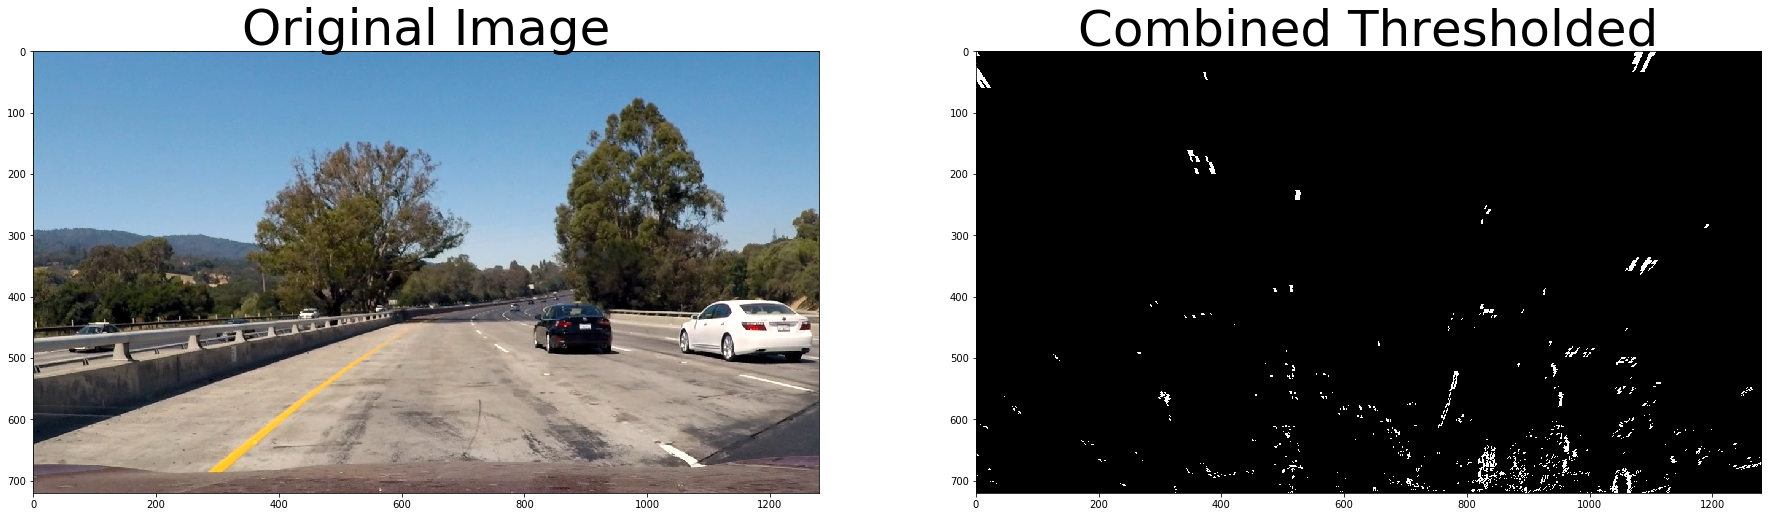

In [70]:
# Make a list of calibration images
images = glob.glob( './test_images/test1*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    # Read in an image and grayscale it
    image   = mpimg.imread(fname)
    # top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
    combined_binary = pipeline(image, ksize = 3)

    #plt.imshow(combined_binary)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(combined_binary, cmap='gray')
    ax2.set_title('Combined Thresholded', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    